# &#x1F4D1; &nbsp; <span style="color:#338DD4"> Reflections. Intro to Algorithms. Lessons 5-6</span>

###  &#x1F578; &nbsp; Links

NP-Completeness: http://web.mst.edu/~ercal/253/SLIDES/PDF/Lec-34.pdf

 Networks, Crowds, and Markets: http://www.cs.cornell.edu/home/kleinber/networks-book/

###  &#x1F578; &nbsp;  Lesson 5. Strong and Weak Bonds

In mathematics, matrix multiplication is a binary operation that takes a pair of matrices, and produces another matrix. Numbers such as the real or complex numbers can be multiplied according to elementary arithmetic. On the other hand, matrices are arrays of numbers, so there is no unique way to define "the" multiplication of matrices. As such, in general the term "matrix multiplication" refers to a number of different ways to multiply matrices. The key features of any matrix multiplication include: the number of rows and columns the original matrices have (called the "size", "order" or "dimension"), and specifying how the entries of the matrices generate the new matrix.

In [3]:
import numpy as np
x1 = np.arange(16.0).reshape((4, 4))
x2 = np.arange(4.0)
np.multiply(x1, x2)

array([[  0.,   1.,   4.,   9.],
       [  0.,   5.,  12.,  21.],
       [  0.,   9.,  20.,  33.],
       [  0.,  13.,  28.,  45.]])

Dijkstra's shortest path algorithm (http://www.bogotobogo.com/python/python_Dijkstras_Shortest_Path_Algorithm.php)

Dijkstra's algorithm is an iterative algorithm that provides us with the shortest path from one particular starting node (a in our case) to all other nodes in the graph.

To keep track of the total cost from the start node to each destination we will make use of the distance instance variable in the Vertex class. The distance instance variable will contain the current total weight of the smallest weight path from the start to the vertex in question. The algorithm iterates once for every vertex in the graph; however, the order that we iterate over the vertices is controlled by a priority queue (actually, in the code, I used heapq).

The value that is used to determine the order of the objects in the priority queue is distance. When a vertex is first created distance is set to a very large number.

When the algorithm finishes the distances are set correctly as are the predecessor (previous in the code) links for each vertex in the graph.

In [5]:
import networkx as nx
g = {1:{2:.5, 3:.2}, 2:{4:.7}, 4:{5:.6, 3:.3}}
G = nx.Graph(g)

In [6]:
G.edges()

[(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]

In [8]:
nx.dijkstra_path(G,1,4)

[1, 2, 4]

In [9]:
# CS215Unit5Code. Code for Dijkstra
def shortest_dist_node(dist):
    best_node = 'undefined'
    best_value = 100000
    for v in dist:
        if dist[v] < best_value:
            (best_node, best_value) = (v, dist[v])
    return best_node

def dijkstra(G,v):
    dist_so_far = {}
    dist_so_far[v] = 0
    final_dist = {}
    while len(final_dist) < len(G):
        w = shortest_dist_node(dist_so_far)
        # lock it down!                                                                                                                                                                                     
        final_dist[w] = dist_so_far[w]
        del dist_so_far[w]
        for x in G[w]:
            if x not in final_dist:
                new_dist = final_dist[w] + G[w][x]
                if (x not in dist_so_far) or (new_dist < dist_so_far[x]):
                    dist_so_far[x] = new_dist
    return final_dist

In [13]:
#
# Modify `expected_c`
# to return the expected value of C[w,x],
# where C[w,x] is the clustering coefficient
# given w and x - two randomly choosen neighbors of v
# 
def expected_C(G,v):
    # G[v].keys() is the set of neighbors of v
    neighbors = G[v].keys()
    degree = len(neighbors)
    exp_ccv = 0
    links = 0.0
    pairs = 0.0
    for w in neighbors:
        for u in neighbors:
            if w != u:
                pairs += 0.5
            if u in G[w].keys(): links += 0.5
    exp_ccv = links/pairs 
    # x in G[w][x] if x and w are connected in the graph (C[w,x])
    return exp_ccv
# YOUR ANSWER HERE: expected value of C[w,x]

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def clustering_coefficient(G,v):
    neighbors = G[v].keys()
    if len(neighbors) == 1: return 0.0
    links = 0.0
    for w in neighbors:
        for u in neighbors:
            if u in G[w]: links += 0.5
    return 2.0*links/(len(neighbors)*(len(neighbors)-1))

flights = [(1,2),(1,3),(2,3),(2,6),(2,4),(2,5),(3,6),(4,5)]
G = {}
for (x,y) in flights: make_link(G,x,y)

for v in [1,2,3,4,5,6]:
    print (v)
    print (expected_C(G,v))
    print (clustering_coefficient(G,v))

1
1.0
1.0
2
0.3
0.3
3
0.6666666666666666
0.6666666666666666
4
1.0
1.0
5
1.0
1.0
6
1.0
1.0


In [14]:
# CS215Unit5Code. Bounds on the Estimate
import random

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

flights = [(1,2),(1,3),(2,3),(2,6),(2,4),(2,5),(3,6),(4,5)]
G = {}
for (x,y) in flights: make_link(G,x,y)

def clustering_coefficient(G,v):
    neighbors = G[v].keys()
    if len(neighbors) == 1: return 0.0
    links = 0.0
    for w in neighbors:
        for u in neighbors:
            if u in G[w]: links += 0.5
    return 2.0*links/(len(neighbors)*(len(neighbors)-1))

v = 2
print ("CC:", clustering_coefficient(G,v))

vindex = {}
d = 0
for w in G[v].keys():
    vindex[d] = w
    d += 1

total = 0
for i in range(1,10):
    if d > 1:
        pick = random.randint(0,d-1)
        v1 = vindex[pick]
        v2 = vindex[(pick+random.randint(1,d-1))%d]
        if v2 in G[v1]: total += 1
    print (i, (total+0.0)/i)

CC: 0.3
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.16666666666666666
7 0.2857142857142857
8 0.375
9 0.4444444444444444


In probability theory, the Chernoff bound, named after Herman Chernoff but due to Herman Rubin,[1] gives exponentially decreasing bounds on tail distributions of sums of independent random variables. It is a sharper bound than the known first or second moment based tail bounds such as Markov's inequality or Chebyshev inequality, which only yield power-law bounds on tail decay. However, the Chernoff bound requires that the variates be independent – a condition that neither the Markov nor the Chebyshev inequalities require.

###  &#x1F578; &nbsp;  Problem Set 5

In [15]:
# 1
# The code below uses a linear
# scan to find the unfinished node
# with the smallest distance from
# the source.
#
# Modify it to use a heap instead
# 

def shortest_dist_node(dist):
    best_node = 'undefined'
    best_value = 1000000
    for v in dist:
        if dist[v] < best_value:
            (best_node, best_value) = (v, dist[v])
    return best_node

def dijkstra(G,v):
    dist_so_far = {}
    dist_so_far[v] = 0
    final_dist = {}
    while len(final_dist) < len(G):
        w = shortest_dist_node(dist_so_far)
        # lock it down!
        final_dist[w] = dist_so_far[w]
        del dist_so_far[w]
        for x in G[w]:
            if x not in final_dist:
                if x not in dist_so_far:
                    dist_so_far[x] = final_dist[w] + G[w][x]
                elif final_dist[w] + G[w][x] < dist_so_far[x]:
                    dist_so_far[x] = final_dist[w] + G[w][x]
    return final_dist

############
# 
# Test

def make_link(G, node1, node2, w):
    if node1 not in G:
        G[node1] = {}
    if node2 not in G[node1]:
        (G[node1])[node2] = 0
    (G[node1])[node2] += w
    if node2 not in G:
        G[node2] = {}
    if node1 not in G[node2]:
        (G[node2])[node1] = 0
    (G[node2])[node1] += w
    return G


def test():
    # shortcuts
    (a,b,c,d,e,f,g) = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
    triples = ((a,c,3),(c,b,10),(a,b,15),(d,b,9),(a,d,4),(d,f,7),(d,e,3), 
               (e,g,1),(e,f,5),(f,g,2),(b,f,1))
    G = {}
    for (i,j,k) in triples:
        make_link(G, i, j, k)

    dist = dijkstra(G, a)
    assert dist[g] == 8 #(a -> d -> e -> g)
    assert dist[b] == 11 #(a -> d -> e -> g -> f -> b)
print (test())

None


#2 

Use your code from earlier to change the Marvel graph to only have characters as nodes. Use 1.0/count as the weight, where count is the number of comic books each character appeared in together

For each character in this list

- 'SPIDER-MAN/PETER PAR'
- 'GREEN GOBLIN/NORMAN '
- 'WOLVERINE/LOGAN '
- 'PROFESSOR X/CHARLES '
- 'CAPTAIN AMERICA'

search your weighted graph. Find all the characters where the shortest path by weight to that character is different by weight from the shortest path measured by counting the number of hops.

For example, there is a direct link between 'SPIDER-MAN/PETER PAR' and 'YAP', but the shortest weighted path between the two is
['SPIDER-MAN/PETER PAR', 'WOLVERINE/LOGAN ', 'SHADOWCAT/KATHERINE ', 'YAP']

As another example, the shortest path by hops between 'WOLVERINE/LOGAN ' and 'HOARFROST/' is 
['WOLVERINE/LOGAN ', 'CITIZEN V II/HELMUT ', 'HOARFROST/'] but by weight, the shortest path is
['WOLVERINE/LOGAN ', 'CYCLOPS/SCOTT SUMMER', 'BEAST/HENRY &HANK& P', 'CAPTAIN AMERICA', 'HAWK', 'HOARFROST/']

We've given you two of the paths. There are over 20 000 more.
When you've found the total number, fill your answer in box.

This is the same data that we've used before, and its available here: Marvel Social Network

In [ ]:
# 3
# Another way of thinking of a path in the Kevin Bacon game 
# is not about finding *short* paths, but by finding paths 
# that don’t use obscure movies.  We will give you a 
# list of movies along with their obscureness score.  
#
# For this assignment, we'll approximate obscurity 
# based on the multiplicative inverse of the amount of 
# money the movie made.  Though, its not really important where
# the obscurity score came from.
#
# Use the the imdb-1.tsv and imdb-weights.tsv files to find
# the obscurity of the “least obscure” 
# path from a given actor to another.  
# The obscurity of a path is the maximum obscurity of 
# any of the movies used along the path.
#
# You will have to do the processing in your local environment
# and then copy in your answer.
#
# Hint: A variation of Dijkstra can be used to solve this problem.
#

# Change the `None` values in this dictionary to be the obscurity score
# of the least obscure path between the two actors
answer = {(u'Boone Junior, Mark', u'Del Toro, Benicio'): None,
          (u'Braine, Richard', u'Coogan, Will'): None,
          (u'Byrne, Michael (I)', u'Quinn, Al (I)'): None,
          (u'Cartwright, Veronica', u'Edelstein, Lisa'): None,
          (u'Curry, Jon (II)', u'Wise, Ray (I)'): None,
          (u'Di Benedetto, John', u'Hallgrey, Johnathan'): None,
          (u'Hochendoner, Jeff', u'Cross, Kendall'): None,
          (u'Izquierdo, Ty', u'Kimball, Donna'): None,
          (u'Jace, Michael', u'Snell, Don'): None,
          (u'James, Charity', u'Tuerpe, Paul'): None,
          (u'Kay, Dominic Scott', u'Cathey, Reg E.'): None,
          (u'McCabe, Richard', u'Washington, Denzel'): None,
          (u'Reid, Kevin (I)', u'Affleck, Rab'): None,
          (u'Reid, R.D.', u'Boston, David (IV)'): None,
          (u'Restivo, Steve', u'Preston, Carrie (I)'): None,
          (u'Rodriguez, Ramon (II)', u'Mulrooney, Kelsey'): None,
          (u'Rooker, Michael (I)', u'Grady, Kevin (I)'): None,
          (u'Ruscoe, Alan', u'Thornton, Cooper'): None,
          (u'Sloan, Tina', u'Dever, James D.'): None,
          (u'Wasserman, Jerry', u'Sizemore, Tom'): None}

# Here are some test cases.
# For example, the obscurity score of the least obscure path
# between 'Ali, Tony' and 'Allen, Woody' is 0.5657
test = {(u'Ali, Tony', u'Allen, Woody'): 0.5657,
        (u'Auberjonois, Rene', u'MacInnes, Angus'): 0.0814,
        (u'Avery, Shondrella', u'Dorsey, Kimberly (I)'): 0.7837,
        (u'Bollo, Lou', u'Jeremy, Ron'): 0.4763,
        (u'Byrne, P.J.', u'Clarke, Larry'): 0.109,
        (u'Couturier, Sandra-Jessica', u'Jean-Louis, Jimmy'): 0.3649,
        (u'Crawford, Eve (I)', u'Cutler, Tom'): 0.2052,
        (u'Flemyng, Jason', u'Newman, Laraine'): 0.139,
        (u'French, Dawn', u'Smallwood, Tucker'): 0.2979,
        (u'Gunton, Bob', u'Nagra, Joti'): 0.2136,
        (u'Hoffman, Jake (I)', u'Shook, Carol'): 0.6073,
        (u'Kamiki, Ry\xfbnosuke', u'Thor, Cameron'): 0.3644,
        (u'Roache, Linus', u'Dreyfuss, Richard'): 0.6731,
        (u'Sanchez, Phillip (I)', u'Wiest, Dianne'): 0.5083,
        (u'Sheppard, William Morgan', u'Crook, Mackenzie'): 0.0849,
        (u'Stan, Sebastian', u'Malahide, Patrick'): 0.2857,
        (u'Tessiero, Michael A.', u'Molen, Gerald R.'): 0.2056,
        (u'Thomas, Ken (I)', u'Bell, Jamie (I)'): 0.3941,
        (u'Thompson, Sophie (I)', u'Foley, Dave (I)'): 0.1095,
        (u'Tzur, Mira', u'Heston, Charlton'): 0.3642}


###  &#x1F578; &nbsp;  Lesson 6. Hardness of Network Problems

In [14]:
#
# Modify long_and_simple_path 
# to build and return the path
# 

# Find me that path!
def long_and_simple_path(G,u,v,l):
    """
    G: Graph
    u: starting node
    v: ending node
    l: minimum length of path
    """

    for v1 in G:
        neighbors = list(G[v1]) #.keys()
        for v2 in neighbors:
            break_link(G, v1, v2)
            condition = long_and_simple_decision(G,u,v,l)
            if not condition:
                make_link(G, v1, v2)
    print (G)
    min_path = [u]
    start = u
    current = list(G[start])[0] #.keys()[0]
    i = 0
    while (current != v) and i < 5:
        min_path.append(current)
        next1 = list(G[current])[0] #.keys()[0]
        next2 = list(G[current])[1] #.keys()[1]
        if next1 == start: (start,current) = (current, next2)
        else: (start,current) = (current, next1)
        i +=1
    return min_path + [v]    

    # Otherwise, build and return the path

#############

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def break_link(G, node1, node2):
    if node1 not in G:
        print ("error: breaking link in a non-existent node")
        return
    if node2 not in G:
        print ("error: breaking link in a non-existent node")
        return
    if node2 not in G[node1]:
        print ("error: breaking non-existent link")
        return
    if node1 not in G[node2]:
        print ("error: breaking non-existent link")
        return
    del G[node1][node2]
    del G[node2][node1]
    return G

flights = [(1,2),(1,3),(2,3),(2,6),(2,4),(2,5),(3,6),(4,5)]
G = {}
for (x,y) in flights: make_link(G,x,y)

def all_perms(seq):
    if len(seq) == 0: return [[]]
    if len(seq) == 1: return [seq, []]
    most = all_perms(list(seq)[1:])
    first = list(seq)[0]
    rest = []
    for perm in most:
        for i in range(len(perm)+1):
            rest.append(perm[0:i] + [first] + perm[i:])
    return most + rest

def check_path(G,path):
    for i in range(len(path)-1):
        if path[i+1] not in G[path[i]]: return False
    return True
    
def long_and_simple_decision(G,u,v,l):
    if l == 0:
        return False
    n = len(G)
    perms = all_perms(G.keys())
    for perm in perms:
        # check path
        if (len(perm) >= l and check_path(G,perm) and perm[0] == u 
            and perm[len(perm)-1] == v): 
            return True
    return False

print (long_and_simple_path(G,1,5,4))

G1 = {1: {2: 1, 3: 1}, 2: {1: 1, 3: 1, 4: 1, 5: 1, 6: 1}, 3: {1: 1, 2: 1, 6: 1}, 
      4: {2: 1, 5: 1}, 5: {2: 1, 4: 1}, 6: {2: 1, 3: 1}}

print (long_and_simple_path(G1,1,4,6))

{1: {3: 1}, 2: {5: 1, 6: 1}, 3: {1: 1, 6: 1}, 4: {}, 5: {2: 1}, 6: {2: 1, 3: 1}}
[1, 3, 6, 2, 5]
{1: {3: 1}, 2: {5: 1, 6: 1}, 3: {1: 1, 6: 1}, 4: {5: 1}, 5: {2: 1, 4: 1}, 6: {2: 1, 3: 1}}
[1, 3, 6, 2, 5, 4]


 Decision problems

◦ Given an input and a question regarding a problem, determine if the
answer is yes or no

 Optimization problems

◦ Find a solution with the “best” or “optimum” value

 Optimization problems can be cast as decision problems
that are easier to study

◦ e.g.: Shortest path: G = unweighted directed graph

 Find a path between u and v that uses the fewest edges (optimization)
 Does a path exist from u to v consisting of at most k edges? (decision)

 Class P consists of (decision) problems that are solvable in polynomial time

 Polynomial-time algorithms

◦ Worst-case running time is O(n^k), for some constant k

◦ Examples: O(n^2), O(n^3), O(1), O(n lg n)
    
 Examples of non-polynomial time: O(2^n) O(n^n), O(n!)

Problems in P are called tractable

 Problems not in P are intractable or unsolvable

◦ Can be solved in reasonable time only for small input size

◦ Or, can not be solved at all

 Are non-polynomial algorithms always worst than polynomial ones?

◦ n^500 is technically tractable, but almost impossible to solve

◦ ((n^lg )^lg)^ lg n is technically intractable, but possible to solve for reasonable size n

Examples of Intractable Problems

Hamiltonian Path: Given a graph G = (V, E), determine a path that
contains each and every vertex in V only once.

Traveling Salesman: Find a minimum weight Hamiltonian Path.
The most popular unsolvable problem

 Alan Turing discovered in the 1930’s that there are problems which
are unsolvable by any algorithm.

 The most famous unsolvable problem is

Halting Problem: Given an arbitrary algorithm and its input, will that algorithm eventually halt,
or will it continue forever in an “infinite loop? ”

Nondeterministic algorithm = two stage procedure:

1) Nondeterministic (“guessing”) stage:
generate randomly an arbitrary string that can be thought of as a candidate solution (“certificate”)

2) Deterministic (“verification”) stage:
take the certificate and the instance to the problem and return YES if the certificate represents a solution NP algorithms (Nondeterministic polynomial) verification stage is polynomial

Warning!: NP does not mean “non-polynomial”
Class NP consists of problems that could be solved by NP
algorithms (i.e., verifiable in polynomial time)

NP-complete problems are defined as the hardest problems in NP

 Most practical problems turn out to be either P or NP-complete.

Reduction is a way of saying that one problem is “easier” than another.

 We say that problem A is easier than problem B, (i.e., we write “A ≤ B”)
 if we can solve A using the algorithm that solves B.
 
 Idea: transform the inputs of A to inputs of B

 Given two problems A, B, we say that A is polynomially
reducible to B (A ≤p B) if:
1. There exists a function f that converts the input of A to inputs of B in
polynomial time
2. A(i) = YES ⇔ B(f(i)) = YES

P & NP-Complete Problems

 Shortest simple path

◦ Given a graph G = (V, E) find a shortest path from a source to all other vertices

◦ Polynomial solution: O(VE)

 Longest simple path

◦ Given a graph G = (V, E) find a longest path from a source to all other vertices

◦ NP-complete

 Euler tour

◦ G = (V, E) a connected, directed graph find a cycle that traverses each edge of G exactly once (may visit a vertex multiple times)

◦ Polynomial solution O(E)

 Hamiltonian cycle

◦ G = (V, E) a connected, directed graph find a cycle that visits each vertex of G exactly once

◦ NP-complete

Satisfiability problem: given a logical expression Φ, find an assignment of values (T/F) to variables xi
that causes Φ to evaluate to T(True)

Ф= x1 or not x2 and x3 or not x4

 SAT was the first problem shown to be NP-complete!

CNF is a special case of SAT

 Φ is in “Conjuctive Normal Form” (CNF)

◦ “AND” of expressions (i.e., clauses)

◦ Each clause contains only “OR”s of the variables and their complements

 E.g.: Ф = (x1 or x2) and (x1 or not x2) and (not x1 or not x2)

A subcase of CNF problem:
    
◦ each clause is limited to at most three literals

e.g.: W = (x1 or not x2 or not x3) and (x2 or x3 or x4) and (not x1 or not x3 or not x4) and (x1 or x2 or x4)

3-CNF is NP-Complete

 Interestingly enough, 2-CNF is in P!

Clique Problem:
    
◦ Undirected graph G = (V, E)

◦ Clique: a subset of vertices in V all connected to each other by edges in E (i.e., forming a complete graph)

◦ Size of a clique: number of vertices it contains
    
Optimization problem:
    
◦ Find a clique of maximum size

Decision problem:
    
◦ Does G have a clique of size k?


In graph theory, graph coloring is a special case of graph labeling; it is an assignment of labels traditionally called "colors" to elements of a graph subject to certain constraints. In its simplest form, it is a way of coloring the vertices of a graph such that no two adjacentvertices share the same color; this is called a vertex coloring. Similarly, an edge coloringassigns a color to each edge so that no two adjacent edges share the same color, and aface coloring of a planar graph assigns a color to each face or region so that no two faces that share a boundary have the same color.
Vertex coloring is the starting point of the subject, and other coloring problems can be transformed into a vertex version. For example, an edge coloring of a graph is just a vertex coloring of its line graph, and a face coloring of a plane graph is just a vertex coloring of itsdual. However, non-vertex coloring problems are often stated and studied as is. That is partly for perspective, and partly because some problems are best studied in non-vertex form, as for instance is edge coloring.

A coloring using at most k colors is called a (proper) k-coloring. The smallest number of colors needed to color a graph G is called its chromatic number, and is often denoted χ(G). Sometimes γ(G) is used, since χ(G) is also used to denote the Euler characteristic of a graph. A graph that can be assigned a (proper) k-coloring is k-colorable, and it is k-chromatic if its chromatic number is exactly k. A subset of vertices assigned to the same color is called a color class, every such class forms an independent set. Thus, a k-coloring is the same as a partition of the vertex set into k independent sets, and the terms k-partite and k-colorable have the same meaning.

In [15]:
############
#
# Verify a coloring of a graph
#
############

# if cert a k-coloring of G?
#   colors in {0, ..., k-1}
def verify(G, cert, k):
    if len(cert) != len(G): 
        return False
    for element in cert.keys():
        if cert[element] not in range(k):
            return False
        for neighbor in G[element]:
            if cert[neighbor] == cert[element]:
                return False
    return True

#######
#
# Testing

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G


(a,b,c,d,e,f,g,h) = ('a','b','c','d','e','f','g','h')
cxns = [(a,c),(a,b),(c,d),(b,d),(d,e),(d,f),(e,g),(f,g),(f,h),(g,h)]

G = {}
for (x,y) in cxns: make_link(G,x,y)


cert = {}
for (node, color) in [(a,0),(b,1),(c,2),(d,0),(e,1),(f,2),(g,0),(h,1)]:
    cert[node] = color
print (verify(G,cert,3))

cert = {}
for (node, color) in [(a,0),(b,1),(c,2),(d,0),(e,0),(f,1),(g,2),(h,0)]:
    cert[node] = color
print (verify(G,cert,4))

True
False


In [37]:
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline
CG = nx.cycle_graph(4)
d = nx.coloring.greedy_color(CG, strategy=nx.coloring.strategy_largest_first)
print (d in [{0: 0, 1: 1, 2: 0, 3: 1}, {0: 1, 1: 0, 2: 1, 3: 0}])

True


In [38]:
d

{0: 0, 1: 1, 2: 0, 3: 1}

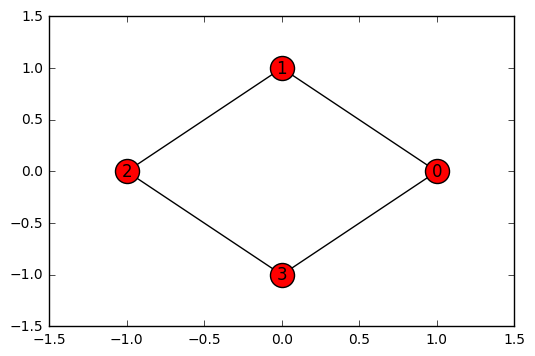

In [39]:
pos=nx.circular_layout(CG)
nx.draw_networkx(CG, pos)

###  &#x1F578; &nbsp;  Problem Set 6

In [40]:
# 1
# In the lecture, we described how a solution to k_clique_decision(G, k)
# can be used to solve independent_set_decision(H,s).  
# Write a Python function that carries out this transformation.  

# Returns a list of all the subsets of a list of size k
def k_subsets(lst, k):
    if len(lst) < k:
        return []
    if len(lst) == k:
        return [lst]
    if k == 1:
        return [[i] for i in lst]
    return k_subsets(lst[1:],k) + map(lambda x: x + [lst[0]], k_subsets(lst[1:], k-1))

# Checks if the given list of nodes forms a clique in the given graph.
def is_clique(G, nodes):
    for pair in k_subsets(nodes, 2):
        if pair[1] not in G[pair[0]]:
            return False
    return True

# Determines if there is clique of size k or greater in the given graph.
def k_clique_decision(G, k):
    nodes = G.keys()
    for i in range(k, len(nodes) + 1):
        for subset in k_subsets(nodes, i):
            if is_clique(G, subset):
                return True
    return False
    
def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def break_link(G, node1, node2):
    if node1 not in G:
        print ("error: breaking link in a non-existent node")
        return
    if node2 not in G:
        print ("error: breaking link in a non-existent node")
        return
    if node2 not in G[node1]:
        print ("error: breaking non-existent link")
        return
    if node1 not in G[node2]:
        print ("error: breaking non-existent link")
        return
    del G[node1][node2]
    del G[node2][node1]
    return G
   
# This function should use the k_clique_decision function
# to solve the independent set decision problem
def independent_set_decision(H, s):
    # your code here
    return True

In [41]:
#2
# Decision problems are often just as hard as actually returning an answer.
# Show how a k-clique can be found using a solution to the k-clique decision 
# problem.  Write a Python function that takes a graph G and a number k 
# as input, and returns a list of k nodes from G that are all connected 
# in the graph.  Your function should make use of "k_clique_decision(G, k)", 
# which takes a graph G and a number k and answers whether G contains a k-clique.  
# We will also provide the standard routines for adding and removing edges from a graph.

# Returns a list of all the subsets of a list of size k
def k_subsets(lst, k):
    if len(lst) < k:
        return []
    if len(lst) == k:
        return [lst]
    if k == 1:
        return [[i] for i in lst]
    return k_subsets(lst[1:],k) + map(lambda x: x + [lst[0]], k_subsets(lst[1:], k-1))

# Checks if the given list of nodes forms a clique in the given graph.
def is_clique(G, nodes):
    for pair in k_subsets(nodes, 2):
        if pair[1] not in G[pair[0]]:
            return False
    return True

# Determines if there is clique of size k or greater in the given graph.
def k_clique_decision(G, k):
    nodes = G.keys()
    for i in range(k, len(nodes) + 1):
        for subset in k_subsets(nodes, i):
            if is_clique(G, subset):
                return True
    return False

def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

def break_link(G, node1, node2):
    if node1 not in G:
        print ("error: breaking link in a non-existent node")
        return
    if node2 not in G:
        print ("error: breaking link in a non-existent node")
        return
    if node2 not in G[node1]:
        print ("error: breaking non-existent link")
        return
    if node1 not in G[node2]:
        print ("error: breaking non-existent link")
        return
    del G[node1][node2]
    del G[node2][node1]
    return G
    
def k_clique(G, k):
    if not k_clique_decision(G, k):
        return False
    # your code here